In [91]:
#Libraries and Functions

import warnings

#Ignore FutureWarning and RuntimeWarning type warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [93]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [94]:
#Data Preprocessing
#Removal of unnecessary/redundant data
#For example, we remove the 'who' column as the 'sex' column already provides us with the information
df.drop(['embarked', 'class', 'who', 'deck','alive'], axis = 1, inplace=True) #axis = 1 to remove elements from the column, not the row (axis = 0)
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True


In [95]:
df.info() #get information about the dataframe, 891 data points in this case

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 57.6+ KB


<Axes: xlabel='survived', ylabel='count'>

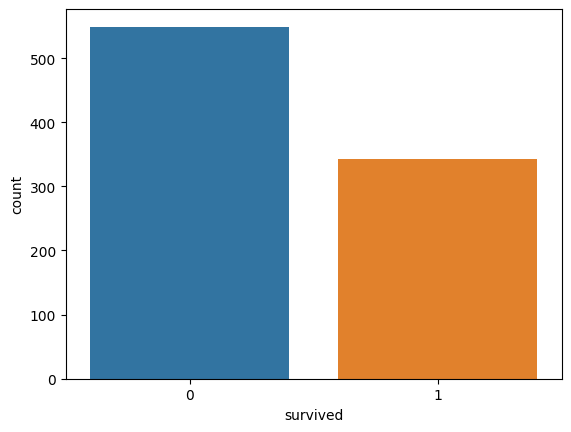

In [96]:
#Data Visualization
#Using the countplot function (seaborn library) to create bar graphs that represent the count of the number of observations in a category
#It is used to visualize the distribution of categories for a variable

sns.countplot(x = 'survived', data=df) #Class imbalance here, more deaths than survivors


In [97]:
df['survived'].value_counts(normalize = True) #Same principle as before but with percentages

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

<Axes: xlabel='pclass', ylabel='count'>

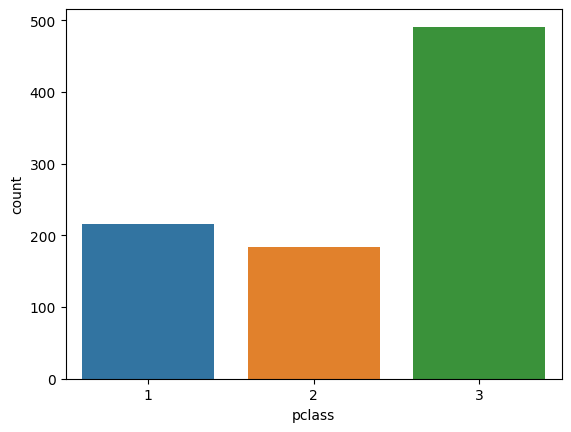

In [98]:
sns.countplot(x = 'pclass', data = df) #The majority of passengers are in the third class

<Axes: xlabel='sex', ylabel='count'>

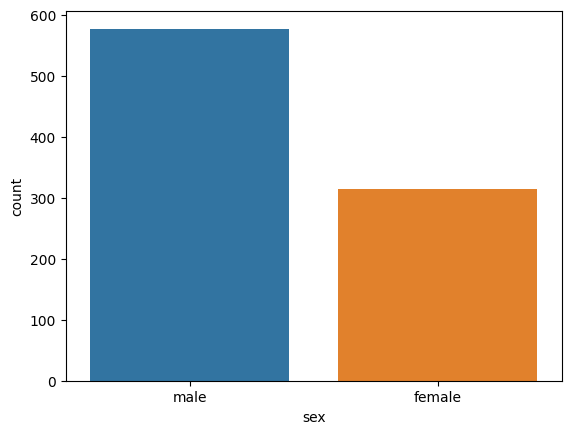

In [99]:
sns.countplot(x = 'sex', data = df) #more male than female

<Axes: ylabel='age'>

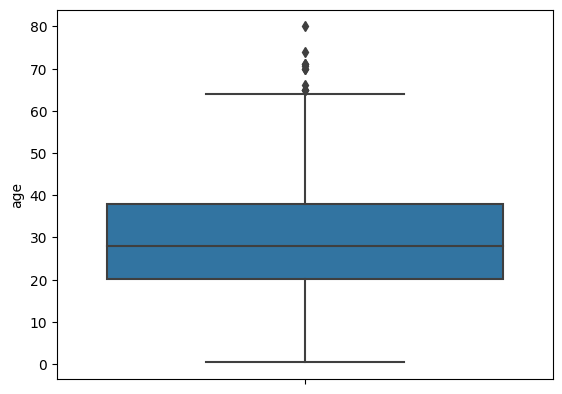

In [14]:
sns.boxplot(y = 'age', data = df) 

<Axes: xlabel='age', ylabel='Count'>

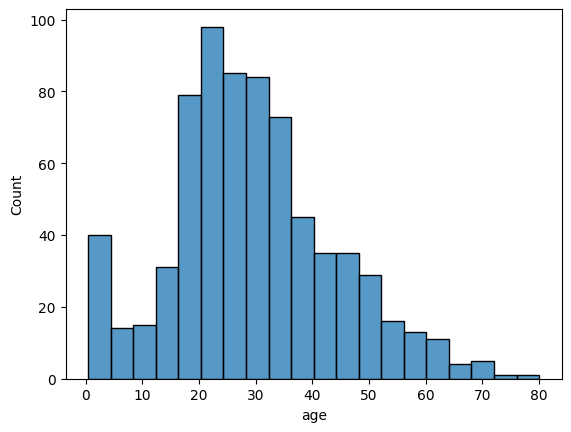

In [15]:
sns.histplot(df['age'], kde=False, bins=20)

<Axes: xlabel='sibsp', ylabel='count'>

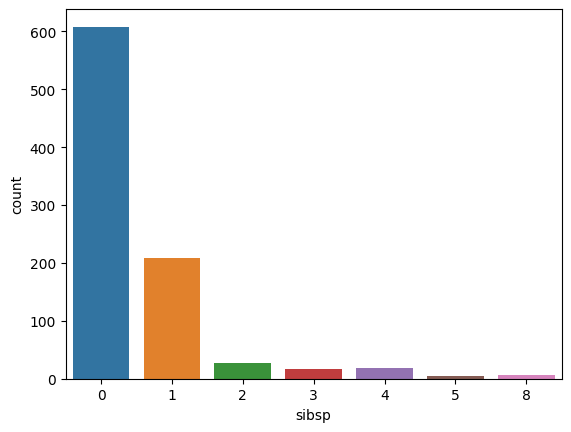

In [100]:
sns.countplot(x = 'sibsp', data = df) #significant class differences, classes 5 and 8 are almost anecdotal

<Axes: xlabel='parch', ylabel='count'>

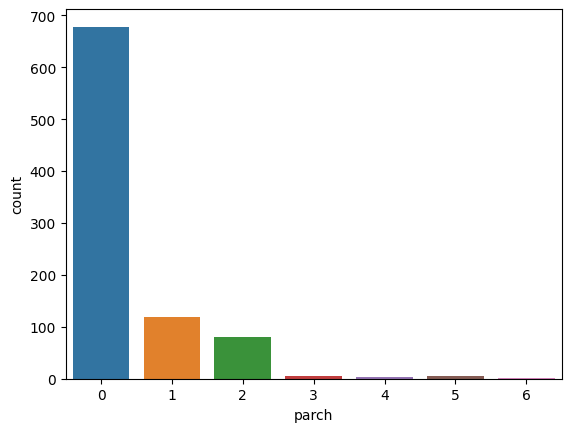

In [101]:
sns.countplot(x = 'parch', data = df)

<Axes: ylabel='fare'>

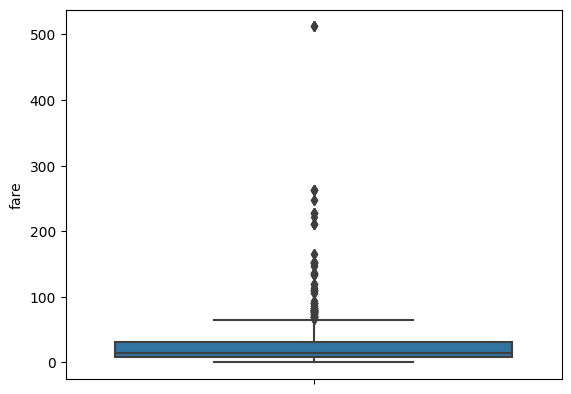

In [102]:
sns.boxplot(y = 'fare', data = df) #many outliers
#a minority paid a very high fare

<Axes: xlabel='fare', ylabel='Count'>

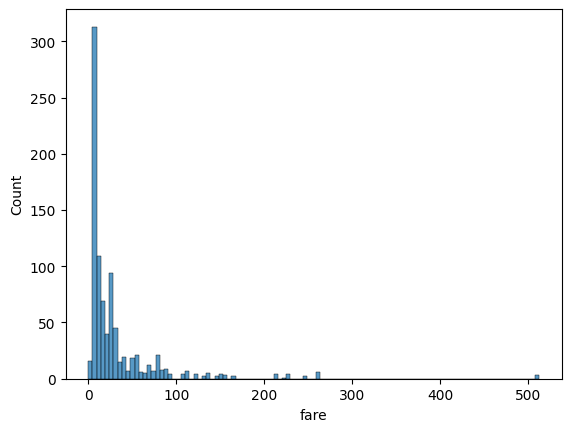

In [103]:
sns.histplot(df['fare'], kde = False)

<Axes: xlabel='adult_male', ylabel='count'>

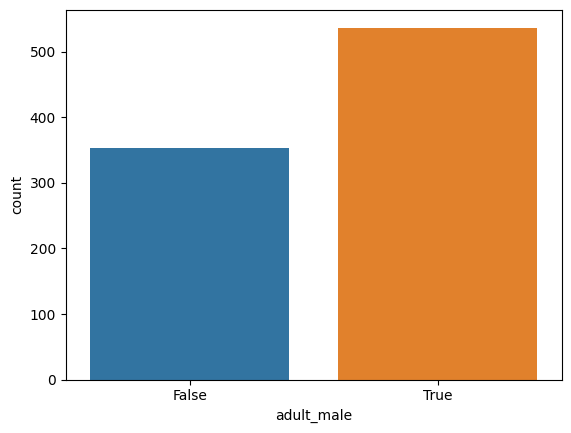

In [104]:
sns.countplot(x = 'adult_male', data = df) #more adults than children for men

In [105]:
pd.crosstab(df['sex'], df['adult_male'])

adult_male,False,True
sex,,
female,314,0
male,40,537


<Axes: xlabel='embark_town', ylabel='count'>

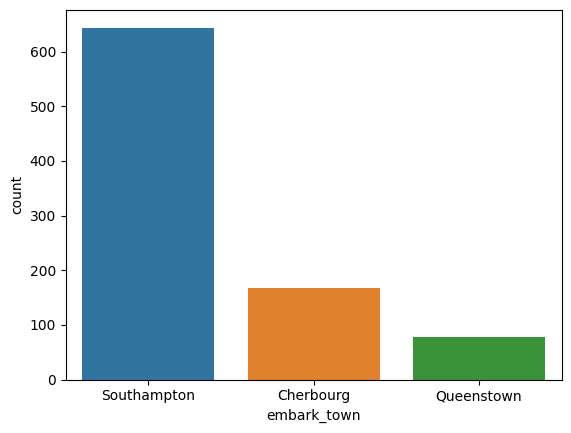

In [106]:
sns.countplot(x = 'embark_town', data = df)

<Axes: xlabel='alone', ylabel='count'>

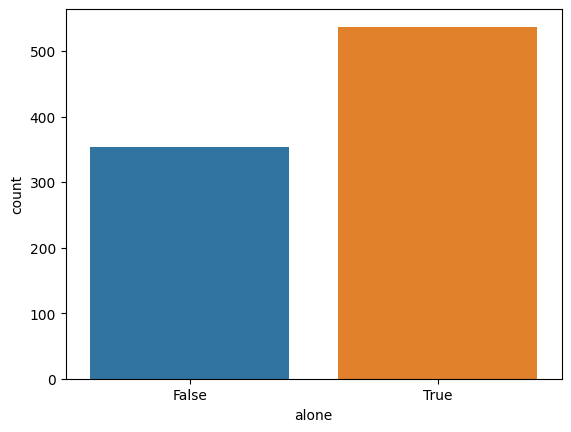

In [107]:
sns.countplot(x = 'alone', data = df)

<Axes: xlabel='survived', ylabel='age'>

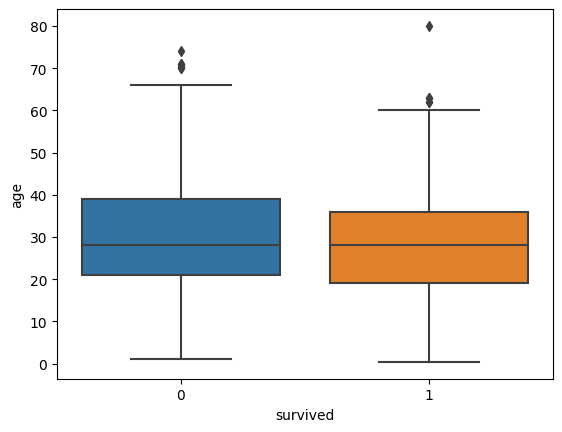

In [108]:
#Relationship between age and target variable
#boxplot: another function that displays the data differently
sns.boxplot(x = 'survived', y = 'age', data=df) #almost the same distribution

<Axes: xlabel='survived', ylabel='fare'>

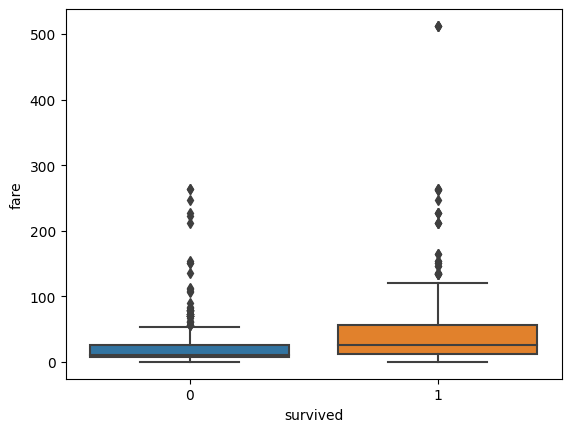

In [109]:
sns.boxplot(x ='survived', y = 'fare', data = df)

In [110]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [112]:
df['fare'].quantile(0.99) #99% of values are below $249, a few values stand out

249.00622000000035

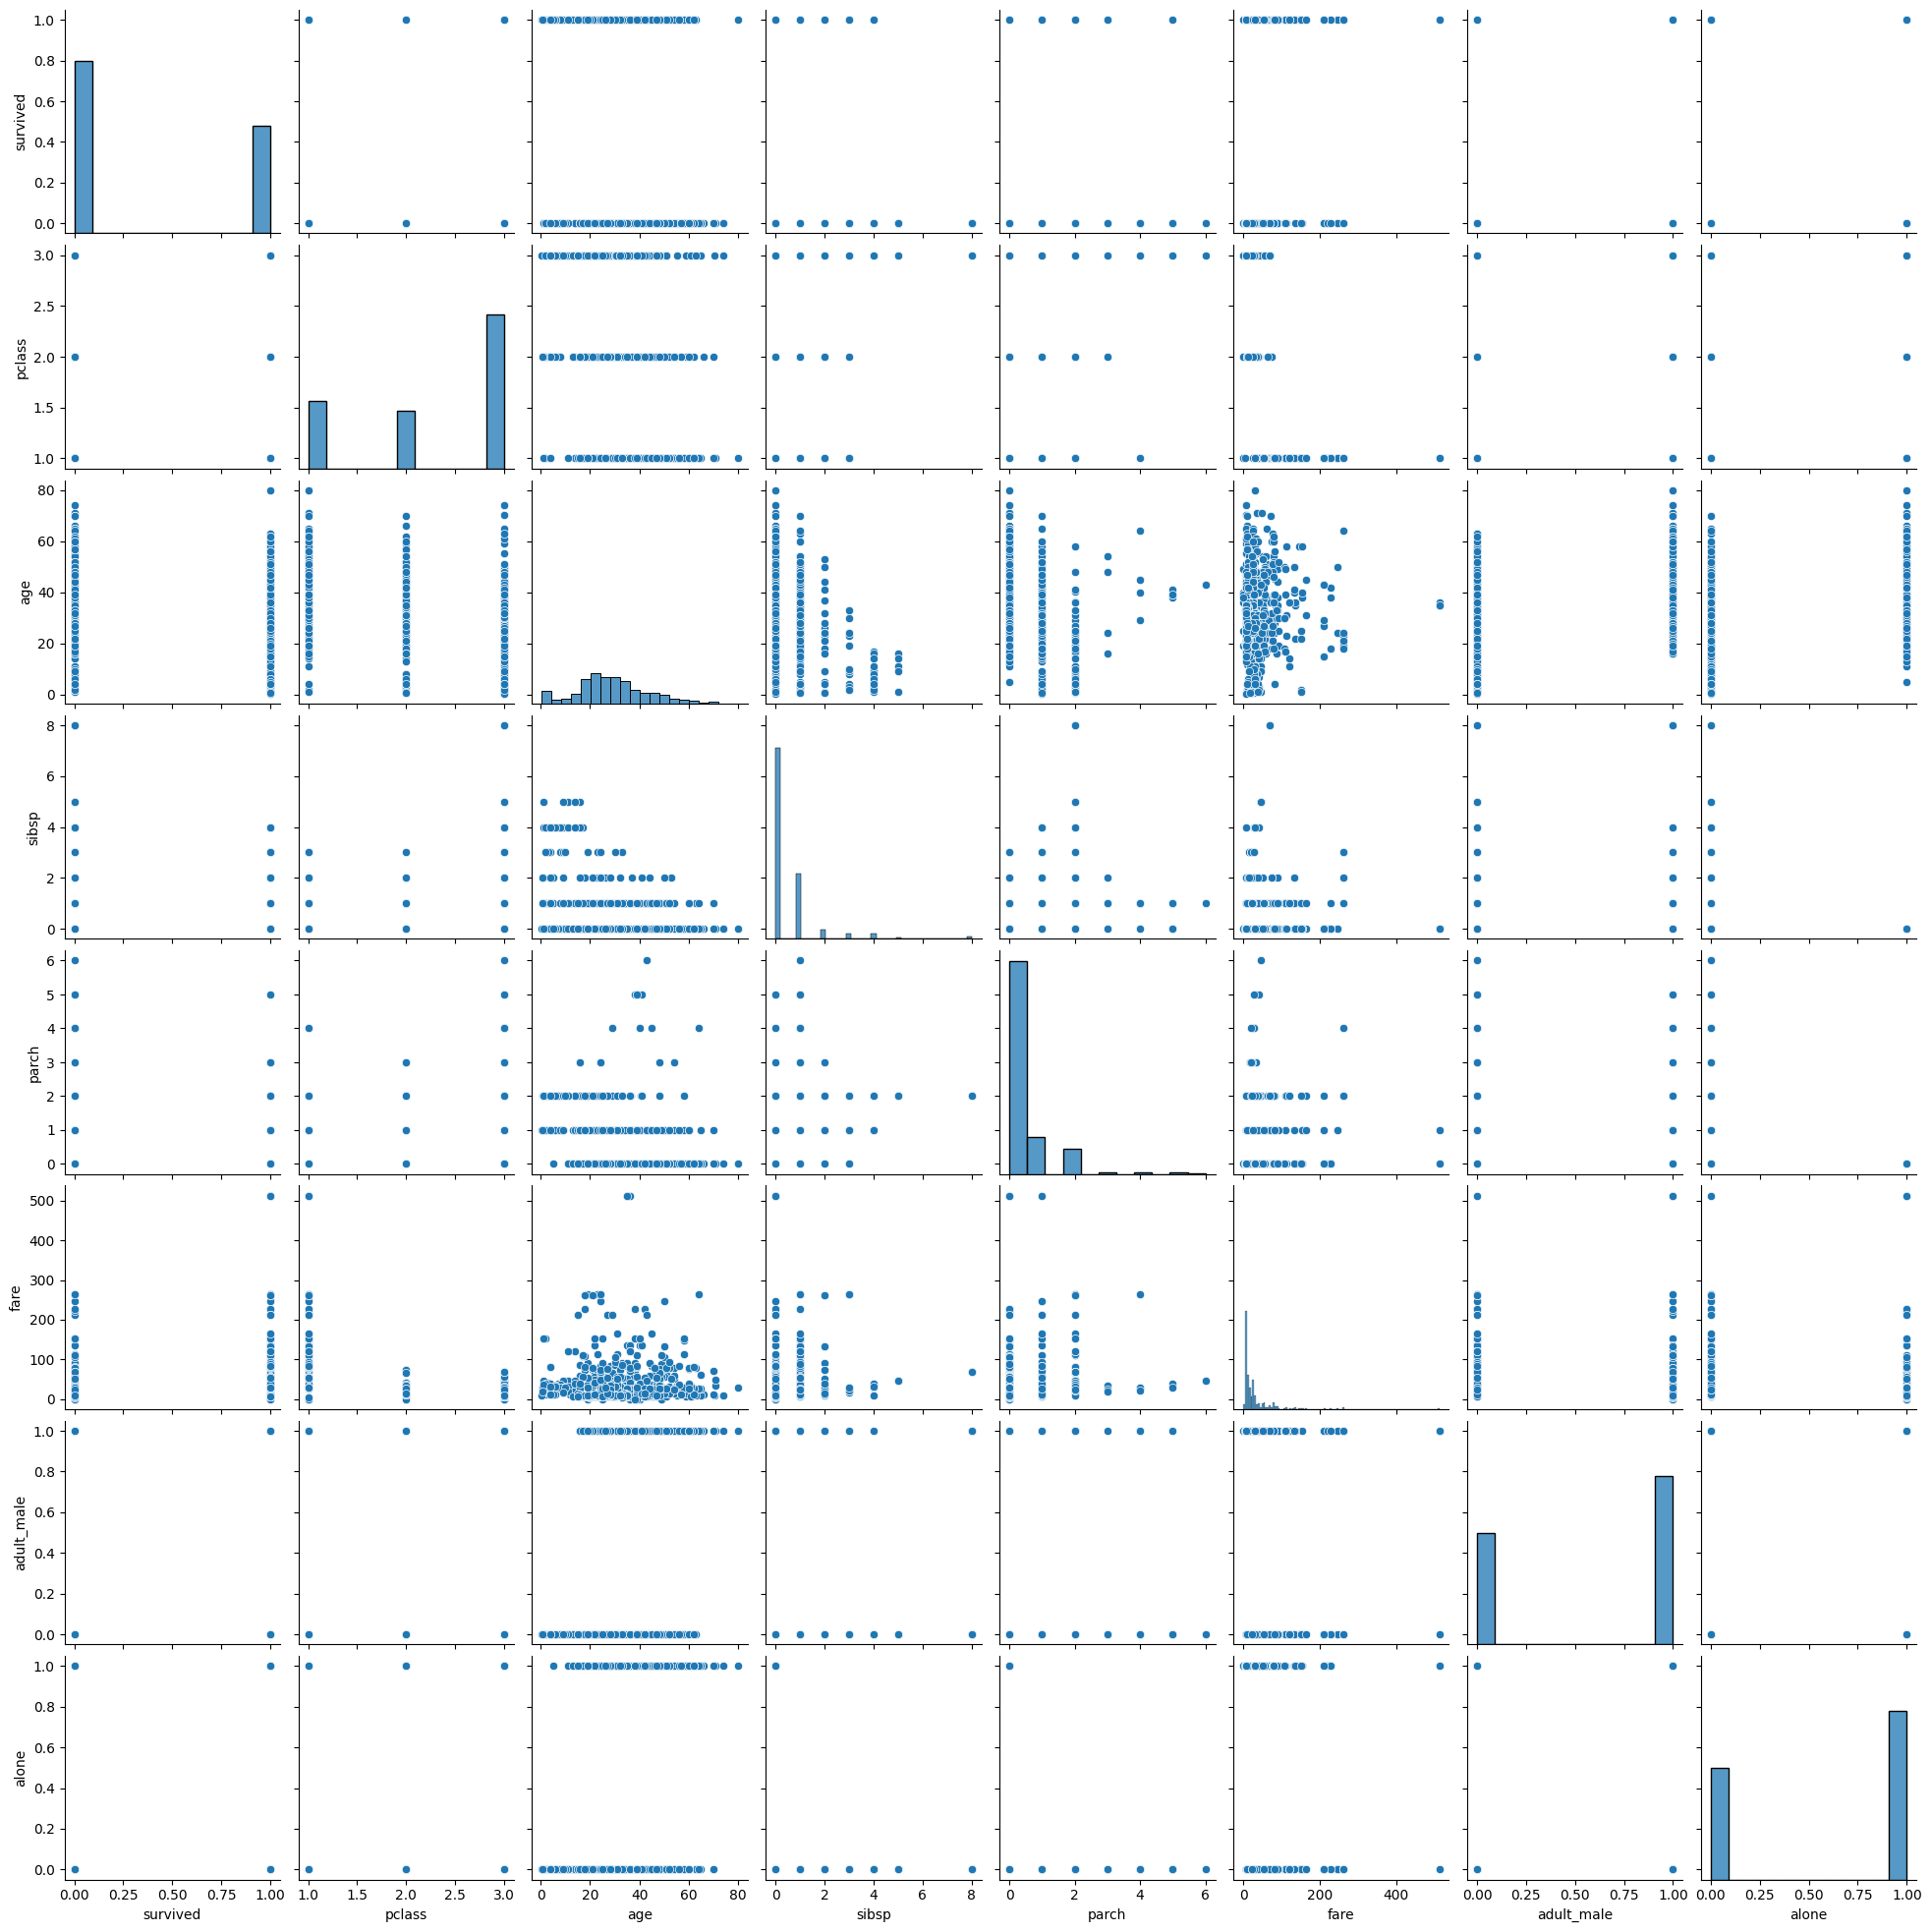

In [113]:
sns.pairplot(df)

In [114]:
#Data Cleaning

df.isna().sum() #provides the number and type of missing values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
adult_male       0
embark_town      2
alone            0
dtype: int64

In [30]:
#df.shape

In [115]:
#Replaces outliers with the mean

df.fillna(value={'age':df['age'].mean()}, inplace=True)

In [116]:
df['age'].std() #difference of 1.5 when replacing values with the median (14.526 --> 13.002)

13.002015226002882

In [117]:
df['embark_town'].value_counts(normalize = True)

embark_town
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: proportion, dtype: float64

In [118]:
df.fillna(value={'embark_town':'Southampton'}, inplace=True)

In [119]:
df.isna().sum() #we no longer have missing values

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [120]:
#Find outlier values
#value < Q1 - 1.5*IQR or value > Q3 + 1.5*IQR  => outlier value

def outliers_values(data, variable):
    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)
    lower = data[variable].quantile(0.25) - 1.5 * IQR
    upper = data[variable].quantile(0.75) + 1.5 * IQR
    return data[(data[variable] < lower) | (data[variable] > upper)]  

In [121]:
outliers_values(df, 'fare').sort_values('fare') #testing for the 'fare' variable + sorting the values in ascending order for the next steps

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
336,0,1,male,29.000000,1,0,66.6000,True,Southampton,False
151,1,1,female,22.000000,1,0,66.6000,False,Southampton,False
369,1,1,female,24.000000,0,0,69.3000,False,Cherbourg,True
641,1,1,female,24.000000,0,0,69.3000,False,Cherbourg,True
846,0,3,male,29.699118,8,2,69.5500,True,Southampton,False
...,...,...,...,...,...,...,...,...,...,...
27,0,1,male,19.000000,3,2,263.0000,True,Southampton,False
341,1,1,female,24.000000,3,2,263.0000,False,Southampton,False
679,1,1,male,36.000000,0,1,512.3292,True,Cherbourg,False
737,1,1,male,35.000000,0,0,512.3292,True,Cherbourg,True


In [122]:
#For the 'fare' column, we have 116 outliers
#Using the IQR, we will determine what is the maximum acceptable value for the 'fare' column

In [123]:
IQR_fare = df['fare'].quantile(0.75) - df['fare'].quantile(0.25)
df['fare'].quantile(0.75) + 1.5 * IQR_fare

65.6344

In [126]:
#All values above 65.6344 are considered outliers

In [127]:
df.loc[(outliers_values(df, 'fare').index, 'fare')] = df['fare'].quantile(0.75) + 1.5 * IQR_fare

<Axes: ylabel='fare'>

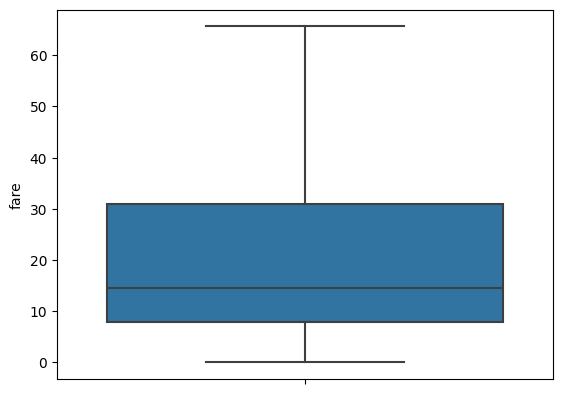

In [128]:
sns.boxplot(y = 'fare', data = df) #we notice that there are no more outliers for the 'fare' variable

In [129]:
#Same for 'age'

df['age'].quantile(0.25) - 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25))

2.5

In [130]:
df['age'].quantile(0.75) + 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25))

54.5

In [131]:
#values below 2.5 will skew some results (for example, in terms of 'fare'), so we will replace them with 2.5
#values above 54.5 will be replaced by 54.5

In [132]:
outliers_values(df,'age').sort_values('age')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
803,1,3,male,0.42,0,1,8.5167,False,Cherbourg,False
755,1,2,male,0.67,1,1,14.5000,False,Southampton,False
469,1,3,female,0.75,2,1,19.2583,False,Cherbourg,False
644,1,3,female,0.75,2,1,19.2583,False,Cherbourg,False
831,1,2,male,0.83,1,1,18.7500,False,Southampton,False
...,...,...,...,...,...,...,...,...,...,...
116,0,3,male,70.50,0,0,7.7500,True,Queenstown,True
96,0,1,male,71.00,0,0,34.6542,True,Cherbourg,True
493,0,1,male,71.00,0,0,49.5042,True,Cherbourg,True
851,0,3,male,74.00,0,0,7.7750,True,Southampton,True


In [133]:
df.loc[df['age'] < df['age'].quantile(0.25) - 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25)), 'age'] = df['age'].quantile(0.25) - 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25))

df.loc[df['age'] > df['age'].quantile(0.75) + 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25)), 'age'] = df['age'].quantile(0.55) + 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25)) 

<Axes: ylabel='age'>

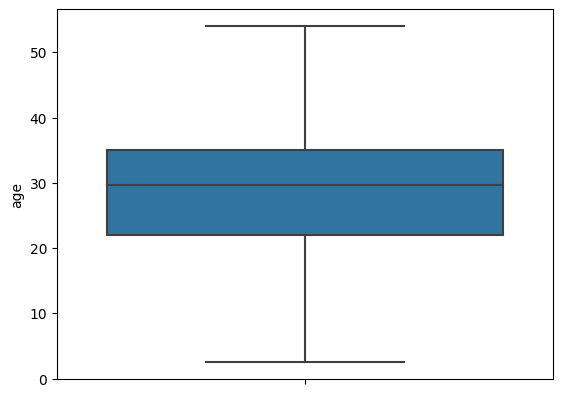

In [134]:
sns.boxplot(y = 'age', data=df) #no more outliers for the 'age' variable

In [135]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,65.6344,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True


In [136]:
#Data Preparation
#Transforming data to have 1s and 0s instead of (female, male, true, false)

df['sex'] = df['sex'].replace({'female':0, 'male':1})

In [137]:
#Transforming booleans into 1s and 0s
df['alone'] = df['alone'].astype('int')
df['adult_male'] = df['adult_male'].astype('int')

In [138]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,1,Southampton,0
1,1,1,0,38.0,1,0,65.6344,0,Cherbourg,0
2,1,3,0,26.0,0,0,7.9250,0,Southampton,1
3,1,1,0,35.0,1,0,53.1000,0,Southampton,0
4,0,3,1,35.0,0,0,8.0500,1,Southampton,1


In [139]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [140]:
#We encode certain variables

embark_dummies = pd.get_dummies(df['embark_town'], drop_first = True)

In [141]:
embark_dummies

,Queenstown,Southampton
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [142]:
df = pd.concat([df, embark_dummies], axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,1,Southampton,0,False,True
1,1,1,0,38.0,1,0,65.6344,0,Cherbourg,0,False,False
2,1,3,0,26.0,0,0,7.9250,0,Southampton,1,False,True
3,1,1,0,35.0,1,0,53.1000,0,Southampton,0,False,True
4,0,3,1,35.0,0,0,8.0500,1,Southampton,1,False,True


In [143]:
df['Queenstown'] = df['Queenstown'].astype('int')
df['Southampton'] = df['Southampton'].astype('int')

#Deletion of embark_town which is no longer necessary

del df['embark_town']

In [144]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,1,0,0,1
1,1,1,0,38.0,1,0,65.6344,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,1,0,1


In [145]:
df['family'] = df['sibsp'] + df['parch']

df.drop(['sibsp','parch'], axis = 1, inplace = True)
df.head()

,survived,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family
0,0,3,1,22.0,7.2500,1,0,0,1,1
1,1,1,0,38.0,65.6344,0,0,0,0,1
2,1,3,0,26.0,7.9250,0,1,0,1,0
3,1,1,0,35.0,53.1000,0,0,0,1,1
4,0,3,1,35.0,8.0500,1,1,0,1,0


In [146]:
#Data Splitting (60% train, 20% validation, 20% test)

from sklearn.model_selection import train_test_split
seed = 111
X = df.drop('survived', axis = 1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = seed, stratify = y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = seed, stratify = y_test)

In [147]:
y.value_counts(normalize = True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [148]:
y_train.value_counts(normalize = True)

survived
0    0.616105
1    0.383895
Name: proportion, dtype: float64

In [149]:
y_val.value_counts(normalize = True)

survived
0    0.617978
1    0.382022
Name: proportion, dtype: float64

In [150]:
#Normalization

##Upsampling Method (Oversampling)

from sklearn.utils import resample

X2 = X_train
X2['survived']  = y_train.values
X2.head()

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
692,3,1,29.699118,56.4958,1,1,0,1,0,1
150,2,1,51.000000,12.5250,1,1,0,1,0,0
886,2,1,27.000000,13.0000,1,1,0,1,0,0
151,1,0,22.000000,65.6344,0,0,0,1,1,1
149,2,1,42.000000,13.0000,1,1,0,1,0,0


In [151]:
minority = X2[X2.survived == 1]
majority = X2[X2.survived == 0]

min_up = resample(minority, replace = True, n_samples = len(majority))

min_up

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
400,3,1,39.000000,7.9250,1,1,0,1,0,1
19,3,0,29.699118,7.2250,0,1,0,0,0,1
526,2,0,50.000000,10.5000,0,1,0,1,0,1
161,2,0,40.000000,15.7500,0,1,0,1,0,1
22,3,0,15.000000,8.0292,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
79,3,0,30.000000,12.4750,0,1,0,1,0,1
697,3,0,29.699118,7.7333,0,1,1,0,0,1
609,1,0,40.000000,65.6344,0,1,0,1,0,1
690,1,1,31.000000,57.0000,1,0,0,1,1,1


In [152]:
majority.shape

(329, 10)

In [153]:
upsampled = pd.concat([majority, min_up])
upsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
150,2,1,51.000000,12.5250,1,1,0,1,0,0
886,2,1,27.000000,13.0000,1,1,0,1,0,0
149,2,1,42.000000,13.0000,1,1,0,1,0,0
249,2,1,54.000000,26.0000,1,0,0,1,1,0
464,3,1,29.699118,8.0500,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
79,3,0,30.000000,12.4750,0,1,0,1,0,1
697,3,0,29.699118,7.7333,0,1,1,0,0,1
609,1,0,40.000000,65.6344,0,1,0,1,0,1
690,1,1,31.000000,57.0000,1,0,0,1,1,1


In [154]:
upsampled['survived'].value_counts(normalize =  True)

survived
0    0.5
1    0.5
Name: proportion, dtype: float64

In [155]:
X_train_up = upsampled.drop('survived', axis = 1)
y_train_up = upsampled['survived']

In [156]:
#Undersampling Method

majority_downsampled = resample(majority, replace = False, n_samples = len(minority))
majority_downsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
24,3,0,8.000000,21.0750,0,0,0,1,4,0
683,3,1,14.000000,46.9000,0,0,0,1,7,0
722,2,1,34.000000,13.0000,1,1,0,1,0,0
349,3,1,42.000000,8.6625,1,1,0,1,0,0
749,3,1,31.000000,7.7500,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
388,3,1,29.699118,7.7292,1,1,1,0,0,0
650,3,1,29.699118,7.8958,1,1,0,1,0,0
7,3,1,2.500000,21.0750,0,0,0,1,4,0
365,3,1,30.000000,7.2500,1,1,0,1,0,0


In [157]:
downsampled = pd.concat([minority, majority_downsampled])

In [158]:
X_train_down = downsampled.drop(['survived'], axis = 1)
y_train_down = downsampled['survived']

In [159]:
#Modeling

##Selection of Important Variables

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Random Forest Model

random_forest = RandomForestClassifier(random_state = seed)

random_forest.fit(X_train_up, y_train_up)

accuracy_score(y_val, random_forest.predict(X_val))


0.7471910112359551

In [160]:
print(X_train_up.columns)
print(random_forest.feature_importances_)

Index(['pclass', 'sex', 'age', 'fare', 'adult_male', 'alone', 'Queenstown',
       'Southampton', 'family'],
      dtype='object')
[0.05910212 0.10969406 0.26544134 0.22917389 0.21553345 0.01263932
 0.007962   0.01533533 0.08511848]


In [161]:
new_variables = pd.Series(random_forest.feature_importances_, index = X_train_up.columns).sort_values(ascending = False)

In [162]:
new_variables

age            0.265441
fare           0.229174
adult_male     0.215533
sex            0.109694
family         0.085118
pclass         0.059102
Southampton    0.015335
alone          0.012639
Queenstown     0.007962
dtype: float64

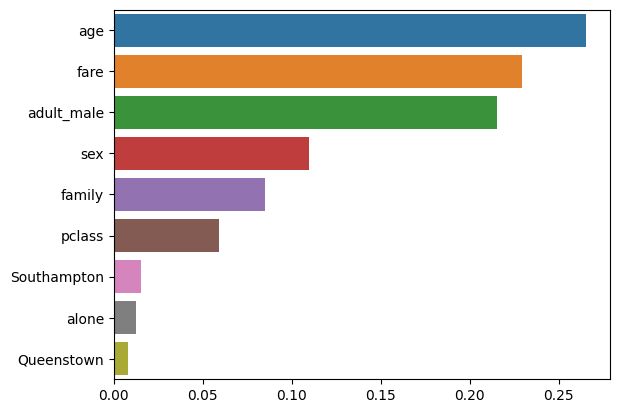

In [163]:
sns.barplot(x = new_variables, y = new_variables.index)
plt.show()

In [164]:
non_new_variables = ['Queenstown']

X_train_up = X_train_up.drop(non_new_variables, axis = 1)
X_val = X_val.drop(non_new_variables, axis = 1)
X_test = X_test.drop(non_new_variables, axis = 1)

In [165]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Log_Reg = LogisticRegression(random_state = seed)

Log_Reg_hyper = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

Log_Reg_cv = GridSearchCV(Log_Reg, Log_Reg_hyper, cv = 5)

Log_Reg_cv.fit(X_train_up, y_train_up)

print(Log_Reg_cv.best_score_)
print(Log_Reg_cv.best_estimator_)

0.8282442748091603
LogisticRegression(C=0.1, random_state=111)


In [166]:
#Random Forest

rf = RandomForestClassifier(random_state = seed)

rf_hyp = {'n_estimators':[5, 10, 20, 50, 100, 200], 'max_depth':[None, 2,5, 10, 15, 20]}

rf_cv = GridSearchCV(rf, rf_hyp, cv = 5)

rf_cv.fit(X_train_up, y_train_up)

print(rf_cv.best_score_)

print(rf_cv.best_estimator_)

0.8951306962757345
RandomForestClassifier(max_depth=15, n_estimators=50, random_state=111)


In [167]:
#SVM

from sklearn.svm import SVC

sv = SVC(probability=True,random_state = seed)

sv_hyp = {'C':[0.1, 1, 10, 100], 'kernel':['linear', 'rbf']}

svm_cv = GridSearchCV(sv, sv_hyp, cv = 5)

svm_cv.fit(X_train_up, y_train_up)

print(svm_cv.best_score_)

print(svm_cv.best_estimator_)

0.8282211427249596
SVC(C=10, kernel='linear', probability=True, random_state=111)


In [168]:
#Bagging Classifier

from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(random_state = seed)

bc_hyp = {'n_estimators':[5, 10, 20, 50, 100, 200]}

bc_cv = GridSearchCV(bc, bc_hyp, cv = 5)

bc_cv.fit(X_train_up, y_train_up)

print(bc_cv.best_score_)

print(bc_cv.best_estimator_)

0.8966574138329862
BaggingClassifier(n_estimators=20, random_state=111)


In [169]:
#Performance Evaluation and Model Selection

def model_evaluation(model, features, labels):
    pred = model.predict(features)
    score = accuracy_score(y_val, pred)
    print('Model global score:', round(score, 3))

In [170]:
models = [Log_Reg_cv.best_estimator_,rf_cv.best_estimator_, svm_cv.best_estimator_, bc_cv.best_estimator_]

for model in models : 
    print('Model' +str(model))
    model_evaluation(model, X_val, y_val)
    print('-'*90)

ModelLogisticRegression(C=0.1, random_state=111)
Model global score: 0.758
------------------------------------------------------------------------------------------
ModelRandomForestClassifier(max_depth=15, n_estimators=50, random_state=111)
Model global score: 0.725
------------------------------------------------------------------------------------------
ModelSVC(C=10, kernel='linear', probability=True, random_state=111)
Model global score: 0.781
------------------------------------------------------------------------------------------
ModelBaggingClassifier(n_estimators=20, random_state=111)
Model global score: 0.747
------------------------------------------------------------------------------------------


In [171]:
#Choose the Best Model
#We are selecting the SVM model.

accuracy_score(y_test, svm_cv.best_estimator_.predict(X_test))

0.8044692737430168

<Axes: ylabel='fare'>

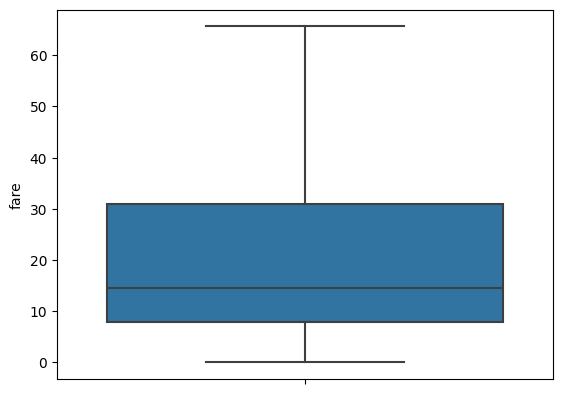

In [172]:
sns.boxplot(y = 'fare', data = df)

<Axes: xlabel='survived', ylabel='fare'>

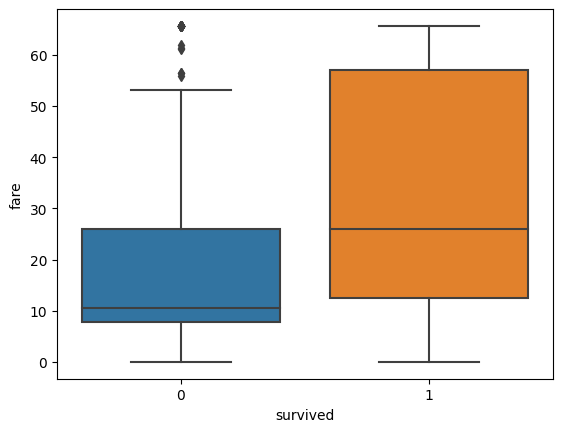

In [173]:
sns.boxplot(x ='survived', y = 'fare', data = df)

<Axes: xlabel='sex', ylabel='count'>

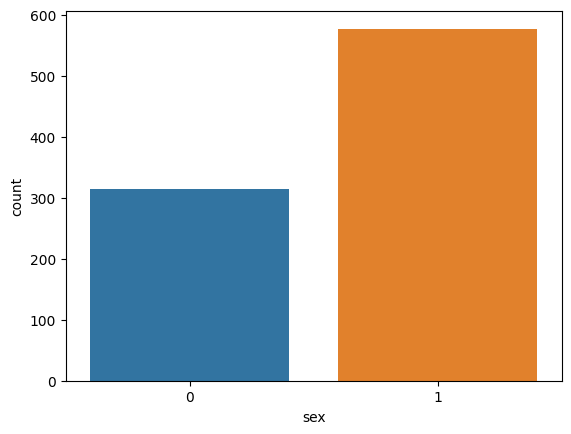

In [174]:
sns.countplot(x = 'sex', data = df)

<Axes: xlabel='pclass', ylabel='count'>

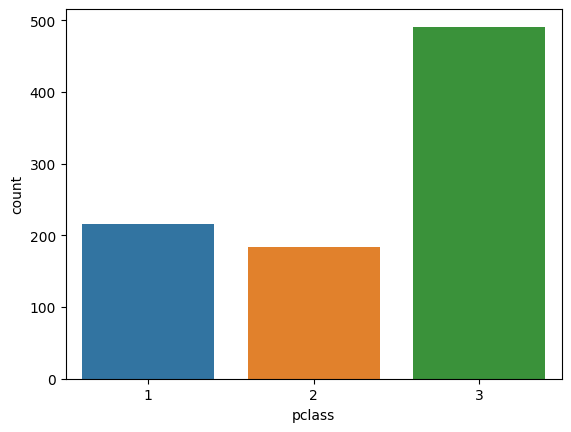

In [175]:
sns.countplot(x = 'pclass', data = df)

<Axes: xlabel='age', ylabel='Count'>

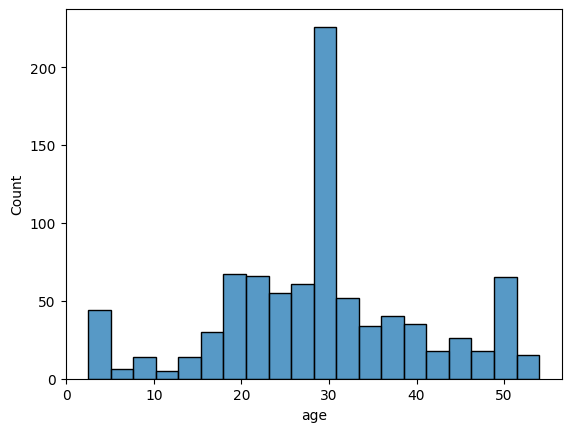

In [176]:
sns.histplot(df['age'], kde=False, bins=20)